<a href="https://colab.research.google.com/github/takky0330/MAIMAI/blob/master/stopcovid19_metro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### お題：

『 [本当に若者の間でコロナの人数が急激に増えているのか検証した話](https://qiita.com/tomone_hata/items/4ba59119dd6b03a14581?utm_source=Qiita%E3%83%8B%E3%83%A5%E3%83%BC%E3%82%B9&utm_campaign=3d901c706b-Qiita_newsletter_420_07_22_2020&utm_medium=email&utm_term=0_e44feaa081-3d901c706b-34562873)』

で出力しているチャートの”人数”を対数化して表示するよう変更する。




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math                                                           ## 追加： mathモジュールを import 

In [ ]:
! wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

--2020-07-27 10:37:26--  https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
Resolving stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)... 192.81.212.192, 104.248.63.248, 2604:a880:400:d1::89c:7001, ...
Connecting to stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)|192.81.212.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 747392 (730K) [text/csv]
Saving to: ‘130001_tokyo_covid19_patients.csv’

130001_tokyo_covid1 100%[===================>] 729.88K  2.20MB/s    in 0.3s    

2020-07-27 10:37:42 (2.20 MB/s) - ‘130001_tokyo_covid19_patients.csv’ saved [747392/747392]



In [ ]:
%matplotlib inline
df_patient = pd.read_csv('./130001_tokyo_covid19_patients.csv')
df_patient['公表_年月日'] = pd.to_datetime(df_patient['公表_年月日'])
df_patient.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df_patient_day = df_patient.groupby(['公表_年月日','患者_年代']).count().reset_index()[['公表_年月日','患者_年代','No']]
df_patient_day

,公表_年月日,患者_年代,No
0,2020-01-24,40代,1
1,2020-01-25,30代,1
2,2020-01-30,30代,1
3,2020-02-13,70代,1
4,2020-02-14,50代,1
...,...,...,...
1068,2020-07-26,50代,23
1069,2020-07-26,60代,11
1070,2020-07-26,70代,15
1071,2020-07-26,80代,6


In [ ]:
genes_dict = {'10歳未満':'under 10',\
         '10代': '10', \
         '20代': '20', \
         '30代': '30', \
         '40代': '40', \
         '50代': '50', \
         '60代': '60', \
         '70代': '70', \
         '80代': '80', \
         '90代': '90', \
         '100歳以上': 'over 100', \
         "'-": '-',
         '不明': 'unknown'
        }

df_patient_day['患者_年代'] = [genes_dict[x] for x in df_patient_day['患者_年代'].values.tolist()]
df_patient_day

,公表_年月日,患者_年代,No
0,2020-01-24,40,1
1,2020-01-25,30,1
2,2020-01-30,30,1
3,2020-02-13,70,1
4,2020-02-14,50,1
...,...,...,...
1068,2020-07-26,50,23
1069,2020-07-26,60,11
1070,2020-07-26,70,15
1071,2020-07-26,80,6


In [ ]:
genes = ['under 10',\
         '10', \
         '20', \
         '30', \
         '40', \
         '50', \
         '60', \
         '70', \
         '80', \
         '90', \
         'over 100', \
         '-',
         'unknown'
        ]
days = pd.date_range(start=df_patient['公表_年月日'].min(), end=df_patient['公表_年月日'].max(), freq='D')
data = [[x, y] for x in days for y in genes]

df_data = pd.DataFrame(data, columns=['公表_年月日', '患者_年代'])
df_data = pd.merge(df_data, df_patient_day, on=['公表_年月日', '患者_年代'], how='left').fillna(0)
df_data = df_data.rename(columns={'No':'人数'})
df_data

,公表_年月日,患者_年代,人数
0,2020-01-24,under 10,0.0
1,2020-01-24,10,0.0
2,2020-01-24,20,0.0
3,2020-01-24,30,0.0
4,2020-01-24,40,1.0
...,...,...,...
2400,2020-07-26,80,6.0
2401,2020-07-26,90,3.0
2402,2020-07-26,over 100,0.0
2403,2020-07-26,-,0.0


In [ ]:
result_diff = {}
_ylim = 0                                                                       ## 追加：_ylim （チャートの高さ）を0で初期化
for x in genes:
    df = df_data[df_data['患者_年代'] == x]
    num = df['人数'].values.tolist()                                               ## 追加：’人数’列の値を、List型で取得
    num_log = [math.log1p(_num) for _num in num]                            ## 追加：人数を 対数化 
    _ylim = max(num_log) if max(num_log) > _ylim else _ylim                  ## 追加：対数化した値が、これまでの年代の最大値より大きい場合 _ylimを更新
    #df = pd.Series(df['人数'].values.tolist(), index=df['公表_年月日'].values)      ## 変更：
    df = pd.Series(num_log, index=df['公表_年月日'].values)                      ## 変更：対数化したListを、pd.Seriesに変換
    result_diff[x] = df.rolling(7).mean().dropna()

(0.0, 5.0)

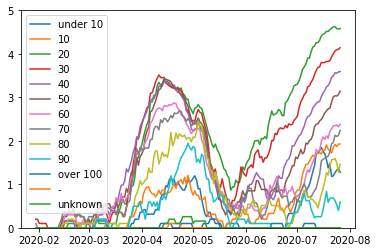

In [ ]:
fig, axe = plt.subplots()
for x in genes:
    df_diff = result_diff[x]
    axe.plot(df_diff.index, df_diff.values, label=x)

axe.legend()
#axe.set_ylim([0,65])                                                           ## 変更：
axe.set_ylim([0,math.ceil(_ylim)])                                               ## 変更： _ylim（対数化した最大値）を切り上げして、チャートの高さに指定




---



##単純に、チャートを対数表示にする場合は、こちらでも表示できる！


In [ ]:
result_diff = {}
for x in genes:
    df = df_data[df_data['患者_年代'] == x]
    df = pd.Series(df['人数'].values.tolist(), index=df['公表_年月日'].values)
    result_diff[x] = df.rolling(7).mean().dropna()

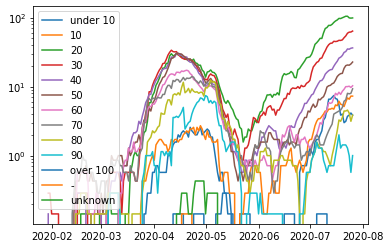

In [ ]:
fig, axe = plt.subplots()
for x in genes:
    df_diff = result_diff[x]
    axe.plot(df_diff.index, df_diff.values, label=x)

axe.legend()
plt.yscale('log')                                                                  ## 追加： yのスケールを ’対数’ に指定する

#axe.set_ylim([0,65])                                                           ## 変更： チャートの大きさを任せる（指定しない）
